# <font color='red'>Case study on unsupervised learning</font>

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
warnings.filterwarnings('ignore',category=UserWarning)
warnings.filterwarnings('ignore',category=FutureWarning)

# 1. Load the dataset into python environment

In [3]:
#Read the dataset and display

data = pd.read_csv(r'C:\Users\HP\Downloads\Wine_clust .csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 2. Do all the necessary pre-processing steps

In [4]:
#Check number of rows and columns of the dataset

data.shape

(178, 13)

In [5]:
#count the null values of the data

data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There is no null values in the dataset

In [6]:
# some basic statistical analysis about the data

data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#type of each columns in the data

data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
#display the columns of the data

data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [10]:
#display type of the data

type(data)

pandas.core.frame.DataFrame

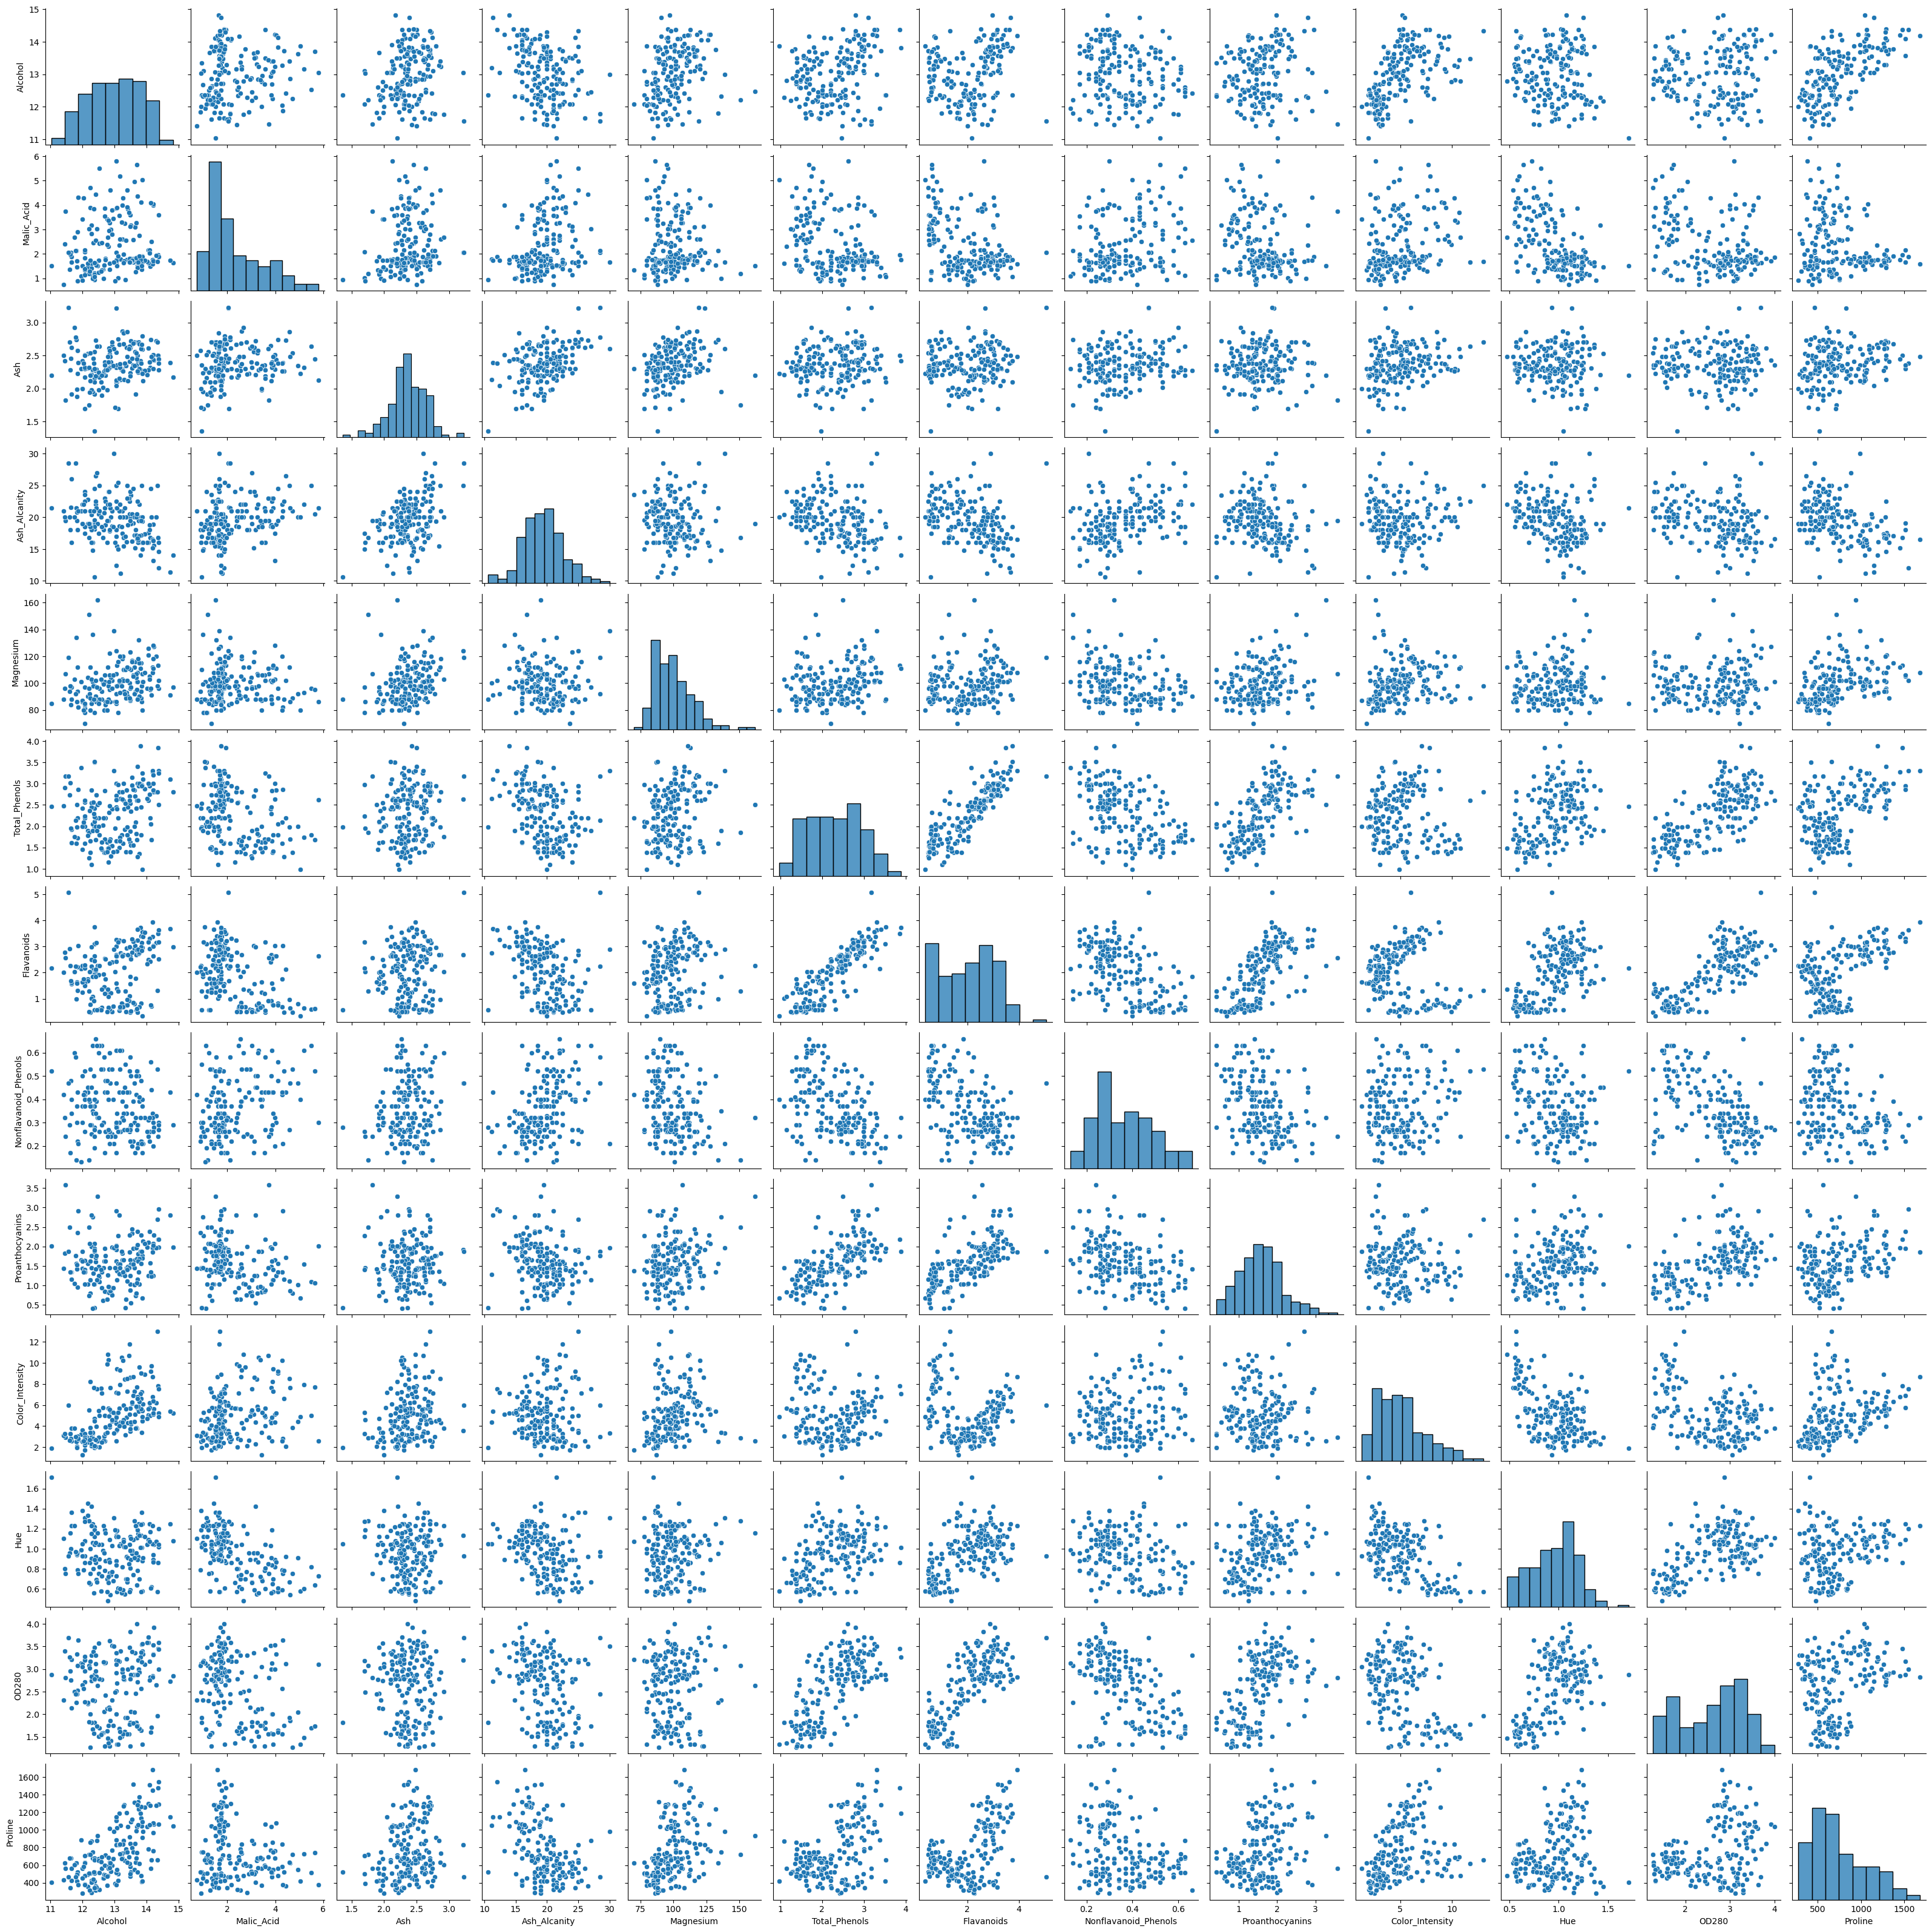

In [11]:
sns.pairplot(data)

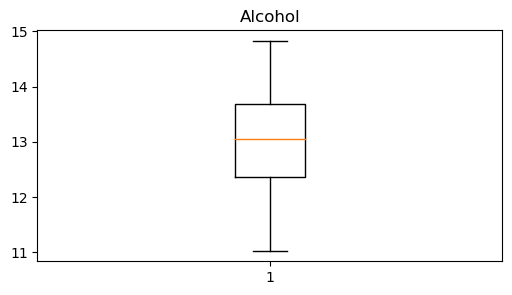

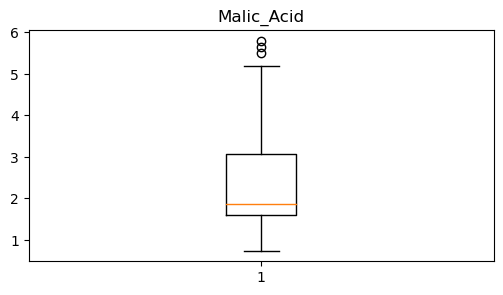

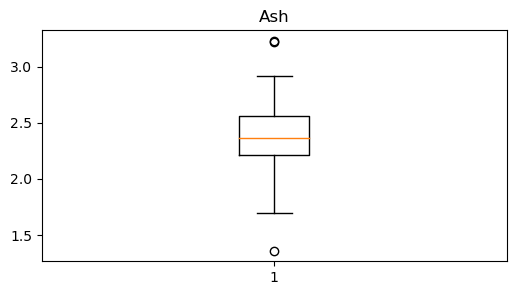

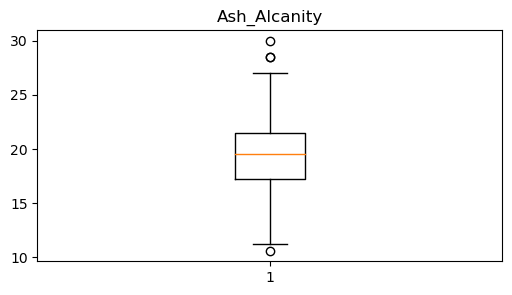

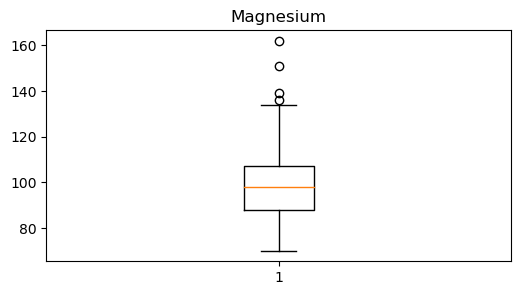

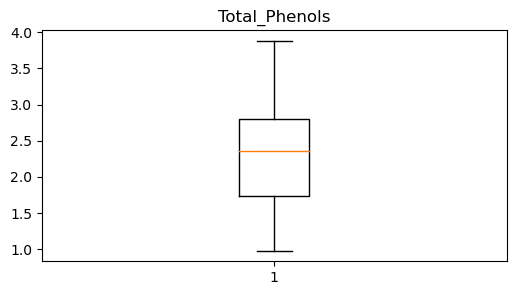

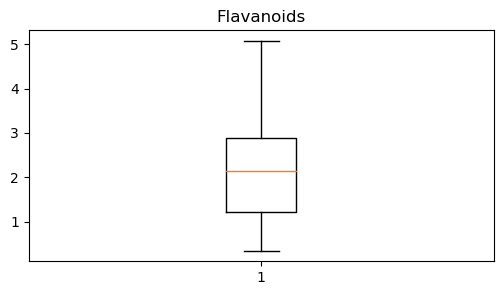

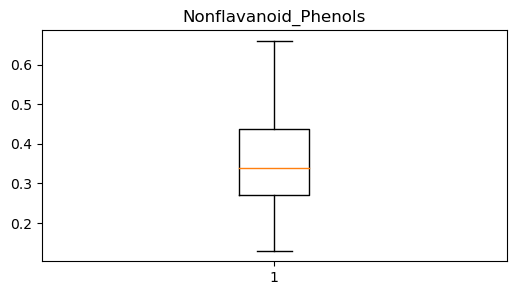

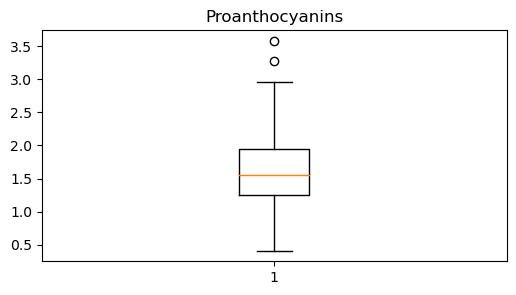

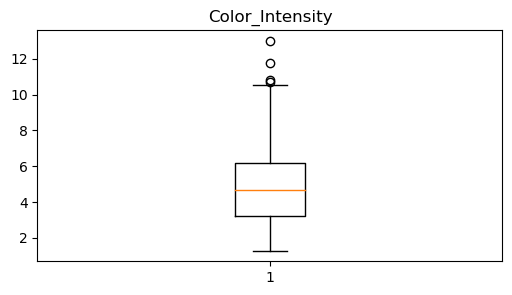

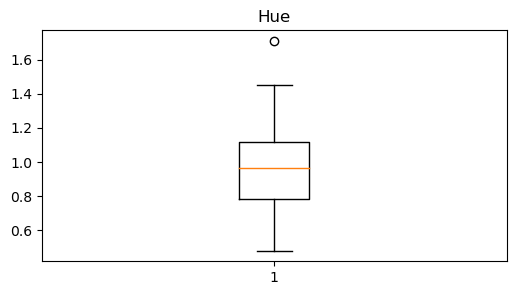

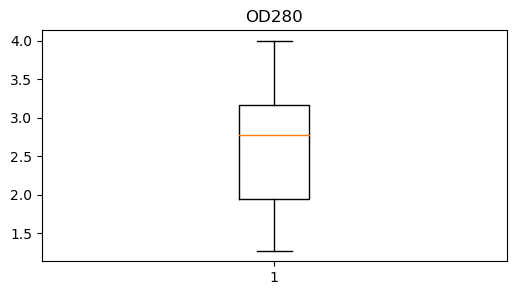

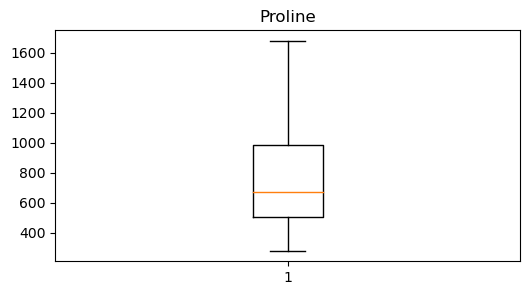

In [12]:
#to check the outliers create boxplots

num_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
for i in num_cols:
    plt.figure(figsize=(6,3))
    plt.boxplot(data[i])
    plt.title(i)

In [13]:
#finding the quartiles for 'Malic_Acid' column

Q1 = np.percentile(data['Malic_Acid'],25,interpolation='midpoint')
Q2 = np.percentile(data['Malic_Acid'],50,interpolation='midpoint')
Q3 = np.percentile(data['Malic_Acid'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)



Q1 =  1.605
Q2 =  1.8650000000000002
Q3 =  3.065
IQR = 1.46
up_lim =  5.255
low_lim =  -0.585


In [14]:
#by using flooring and capping handle the outliers

data['Malic_Acid'] = np.where(data['Malic_Acid']>up_lim,up_lim,np.where(data['Malic_Acid']<low_lim,low_lim,data['Malic_Acid']))


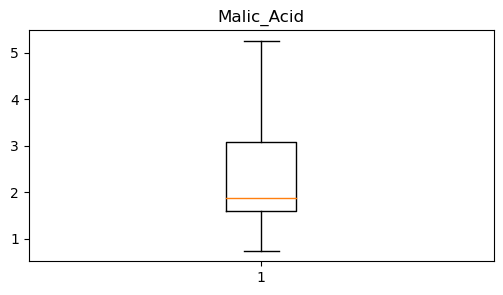

In [15]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Malic_Acid'])
plt.title('Malic_Acid')
plt.show()

In [16]:
#finding the quartiles for 'Ash' column

Q1 = np.percentile(data['Ash'],25,interpolation='midpoint')
Q2 = np.percentile(data['Ash'],50,interpolation='midpoint')
Q3 = np.percentile(data['Ash'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

Q1 =  2.21
Q2 =  2.36
Q3 =  2.5549999999999997
IQR = 0.34499999999999975
up_lim =  3.0724999999999993
low_lim =  1.6925000000000003


In [17]:
#by using flooring and capping handle the outliers

data['Ash'] = np.where(data['Ash']>up_lim,up_lim,np.where(data['Ash']<low_lim,low_lim,data['Ash']))


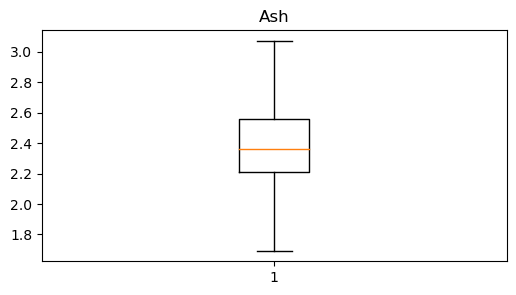

In [18]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Ash'])
plt.title('Ash')
plt.show()

In [19]:
#finding the quartiles for 'Ash_Alcanity'' column

Q1 = np.percentile(data['Ash_Alcanity'],25,interpolation='midpoint')
Q2 = np.percentile(data['Ash_Alcanity'],50,interpolation='midpoint')
Q3 = np.percentile(data['Ash_Alcanity'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

Q1 =  17.2
Q2 =  19.5
Q3 =  21.5
IQR = 4.300000000000001
up_lim =  27.950000000000003
low_lim =  10.749999999999998


In [20]:
#by using flooring and capping handle the outliers

data['Ash_Alcanity'] = np.where(data['Ash_Alcanity']>up_lim,up_lim,np.where(data['Ash_Alcanity']<low_lim,low_lim,data['Ash_Alcanity']))


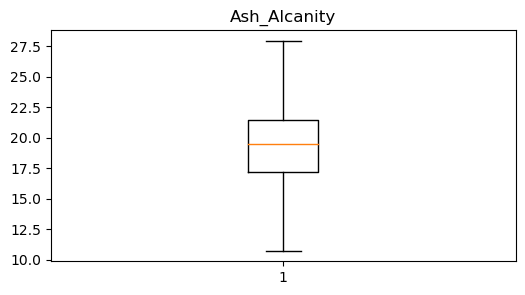

In [21]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Ash_Alcanity'])
plt.title('Ash_Alcanity')
plt.show()

In [22]:
#finding the quartiles for 'Magnesium' column

Q1 = np.percentile(data['Magnesium'],25,interpolation='midpoint')
Q2 = np.percentile(data['Magnesium'],50,interpolation='midpoint')
Q3 = np.percentile(data['Magnesium'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

Q1 =  88.0
Q2 =  98.0
Q3 =  107.0
IQR = 19.0
up_lim =  135.5
low_lim =  59.5


In [23]:
#by using flooring and capping handle the outliers

data['Magnesium'] = np.where(data['Magnesium']>up_lim,up_lim,np.where(data['Magnesium']<low_lim,low_lim,data['Magnesium']))


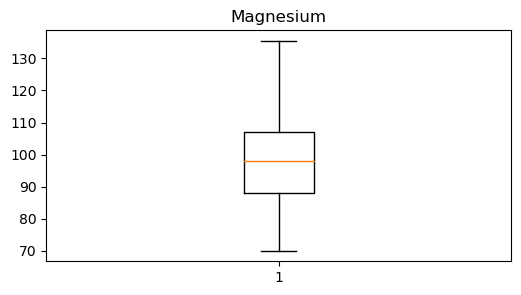

In [24]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Magnesium'])
plt.title('Magnesium')
plt.show()

In [25]:
#finding the quartiles for 'Proanthocyanins'' column

Q1 = np.percentile(data['Proanthocyanins'],25,interpolation='midpoint')
Q2 = np.percentile(data['Proanthocyanins'],50,interpolation='midpoint')
Q3 = np.percentile(data['Proanthocyanins'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

Q1 =  1.25
Q2 =  1.5550000000000002
Q3 =  1.95
IQR = 0.7
up_lim =  3.0
low_lim =  0.20000000000000018


In [26]:
#by using flooring and capping handle the outliers

data['Proanthocyanins'] = np.where(data['Proanthocyanins']>up_lim,up_lim,np.where(data['Proanthocyanins']<low_lim,low_lim,data['Proanthocyanins']))

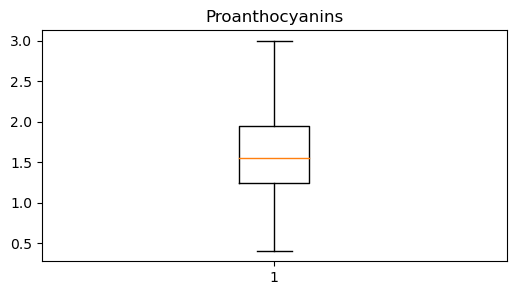

In [27]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Proanthocyanins'])
plt.title('Proanthocyanins')
plt.show()

In [28]:
#finding the quartiles for 'Color_Intensity' column

Q1 = np.percentile(data['Color_Intensity'],25,interpolation='midpoint')
Q2 = np.percentile(data['Color_Intensity'],50,interpolation='midpoint')
Q3 = np.percentile(data['Color_Intensity'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

Q1 =  3.23
Q2 =  4.6899999999999995
Q3 =  6.2
IQR = 2.97
up_lim =  10.655000000000001
low_lim =  -1.225


In [29]:
#by using flooring and capping handle the outliers

data['Color_Intensity'] = np.where(data['Color_Intensity']>up_lim,up_lim,np.where(data['Color_Intensity']<low_lim,low_lim,data['Color_Intensity']))

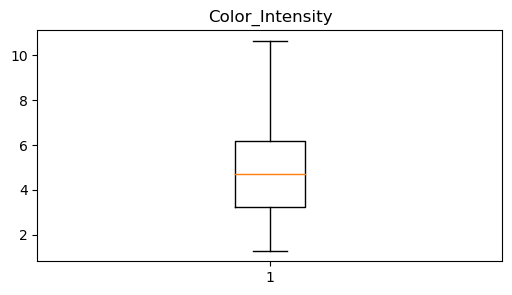

In [30]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Color_Intensity'])
plt.title('Color_Intensity')
plt.show()



In [31]:
#finding the quartiles for 'Hue' column

Q1 = np.percentile(data['Hue'],25,interpolation='midpoint')
Q2 = np.percentile(data['Hue'],50,interpolation='midpoint')
Q3 = np.percentile(data['Hue'],75,interpolation='midpoint')


#print the quartiles

print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)

#calculating interquartile range(IQR) and print it

IQR = Q3-Q1
print('IQR =', IQR)

#setting upperlimits and lower limits for outliers and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print('up_lim = ',up_lim)
print('low_lim = ',low_lim)

Q1 =  0.785
Q2 =  0.965
Q3 =  1.12
IQR = 0.3350000000000001
up_lim =  1.6225000000000003
low_lim =  0.28249999999999986


In [32]:
#by using flooring and capping handle the outliers

data['Hue'] = np.where(data['Hue']>up_lim,up_lim,np.where(data['Hue']<low_lim,low_lim,data['Hue']))

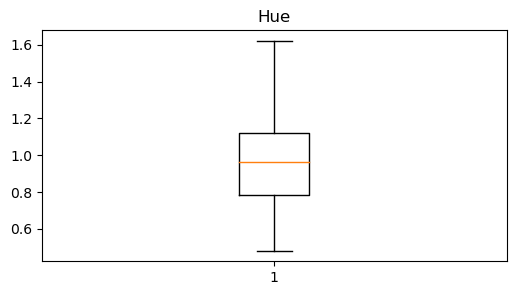

In [33]:
#boxplot with handled outliers

plt.figure(figsize=(6,3))
plt.boxplot(data['Hue'])
plt.title('Hue')
plt.show()


# Correlation Heatmap

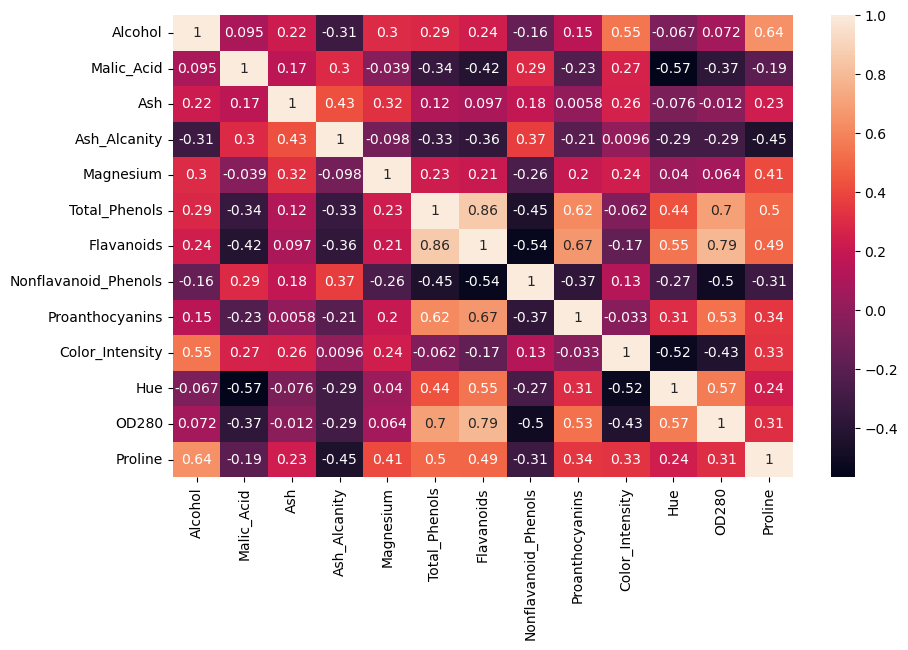

In [34]:
corrmatrix = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corrmatrix,annot=True)
plt.show()

# Standard Scaling

In [35]:
#scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#values are stored as numpy array

scaled_data = pd.DataFrame(scaled_data , columns = data.columns)

#converted to DataFrame
scaled_data.describe()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,3.991813e-17,1.746418e-16,-3.592632e-16,-7.983626e-17,0.000000,-3.991813e-16,3.592632e-16,2.395088e-16,2.544781e-16,-3.991813e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.451821e+00,-2.566125e+00,-2.662213e+00,-2.204108e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.667410e+00,-2.106758e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.640958e-01,-5.963443e-01,-6.948555e-01,-8.584597e-01,-0.885468,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.065959e-01,-7.705932e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.243533e-01,-2.539341e-02,6.682950e-03,-1.108774e-01,0.095960,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.543294e-01,3.552270e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.875955e-01,7.263585e-01,6.167164e-01,5.619467e-01,0.808997,8.490851e-01,6.095413e-01,6.538695e-01,5.156860e-01,7.201691e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.671750e+00,2.686623e+00,2.584074e+00,2.692556e+00,2.539515,3.062832e+00,2.402403e+00,2.540381e+00,2.492453e+00,2.939748e+00,1.960915e+00,2.971473e+00


In [36]:
df = scaled_data

In [37]:
X = df.values

In [38]:
type(X)

numpy.ndarray

In [39]:
df.shape

(178, 13)

# PCA

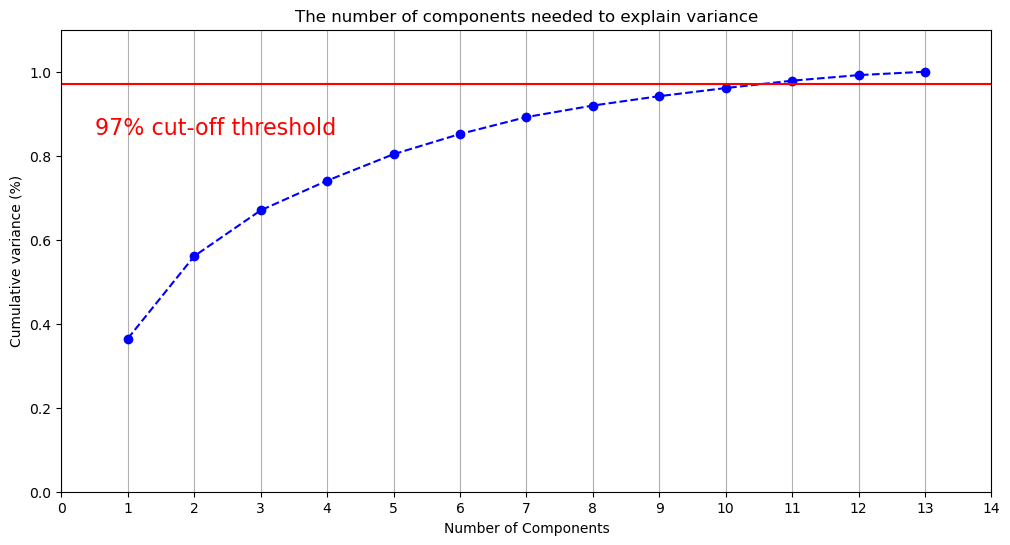

In [40]:
from sklearn.decomposition import PCA
pca = PCA().fit(df)

plt.rcParams["figure.figsize"] = (12,6)
# .rcParams is a dictionary-like object in matplotlib that stores the runtime configuration settings for the library
#  It provides a way to customize the behavior and appearance of matplotlib plots

fig, ax = plt.subplots()
#creates new figure and axes object
# fig: variable representing the figure
# ax: variable representing the axes on which the data is plotted

xi = np.arange(1, 14, step=1)
# creates an array xi that contains numbers from 1 to 30 (inclusive) with a step of 1
#  used as the x-values for plotting purposes

y = np.cumsum(pca.explained_variance_ratio_)
# calculates the cumulative sum of the explained variance ratio from a PCA (Principal Component Analysis) object, 
# assuming pca is a valid PCA model
# resulting values are stored in the array 'y' and are typically used as the y-values for plotting


# setting the y axis limits
plt.ylim(0.0,1.1)
# The first argument 0.0 represents the lower limit, and the second argument 1.1 represents the upper limit
# y axis ranges from 0 to 1.1

plt.plot(xi, y, marker='o', linestyle='--', color='b')
# setting plot characteristics of the graph

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 15, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.97, color='r', linestyle='-')
# adds a horizontal line to the plot at the y-coordinate value of 0.97

plt.text(0.5, 0.85, '97% cut-off threshold', color = 'red', fontsize=16)
# adds a text annotation to the plot at the specified coordinates
# 0.5, represents the x-coordinate of the text position, and 0.85, represents the y-coordinate

ax.grid(axis='x')
plt.show()

In [41]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(data = pca.fit_transform(X),columns=['PCA1','PCA2'])

In [42]:
reduced_X.head()

,PCA1,PCA2
0,3.358011,-1.520821
1,2.229443,0.332889
2,2.539566,-1.038150
3,3.780555,-2.783620
4,1.016268,-0.956354


# Kmeans clustering

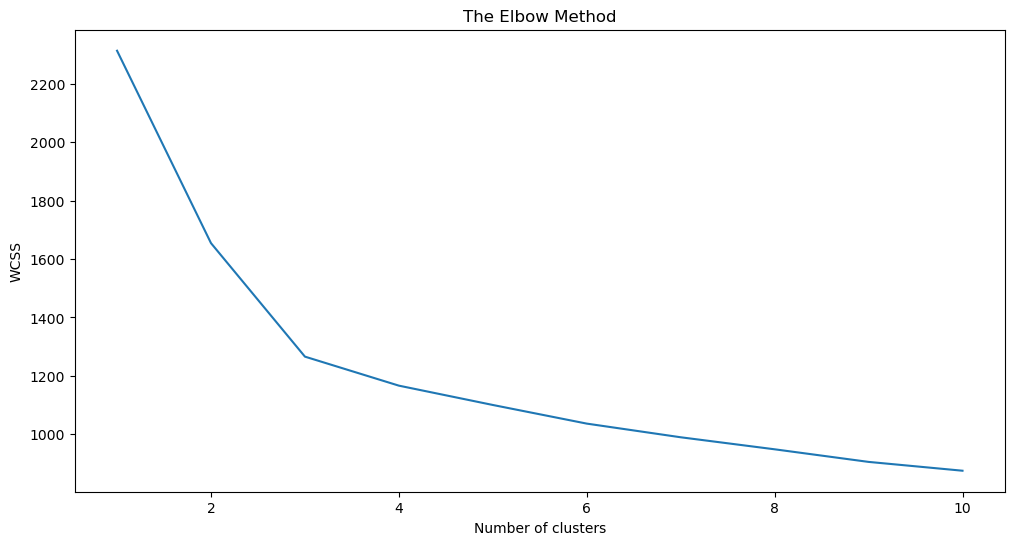

In [43]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


#The significance of the "random state" parameter lies in its ability to control the randomness and 
#reproducibility of results in machine learning algorithms
#choice of random state value is not inherently important; what matters is using a specific value to ensure 
#reproducibility across multiple runs of an algorithm

In [44]:
#k-means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

#kmeans is the trained model
#y_kmeans: array contains the cluster labels that were assigned to the training data during the fitting process
#The fit_predict() method of the KMeans class is used to fit the model to the data and obtain the 
#cluster assignments for each sample. 
#The resulting cluster labels are stored in y_kmeans

In [45]:
#Assigning cluster to Customer type

# Get the cluster labels for each sample
labels = kmeans.labels_


# Add a new column for customer types based on cluster labels
df['Cluster'] = labels

In [46]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-2.72568541, -1.13960056],
       [-0.04527395,  1.79173861],
       [ 2.28956069, -0.94102228]])

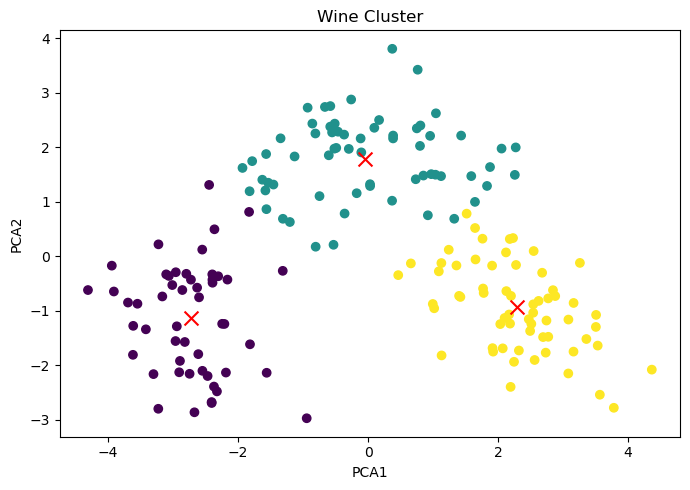

In [47]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [48]:
pca.components_

array([[ 0.14634181, -0.24587015, -0.00370966, -0.24469318,  0.1408168 ,
         0.39337257,  0.42170857, -0.29681511,  0.31610369, -0.0859323 ,
         0.29671779,  0.37445268,  0.28665761],
       [-0.47640648, -0.22681676, -0.3188037 ,  0.01459129, -0.32544233,
        -0.05974886,  0.0063788 , -0.02632844, -0.03046632, -0.5250706 ,
         0.27324558,  0.16612779, -0.36143725]])

In [49]:
from sklearn.metrics import silhouette_score

In [50]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_kmeans)
print('silhouette score : ',silhouette_avg1)

silhouette score :  0.28550310855094574


# Agglomerative Hierarchial clustering


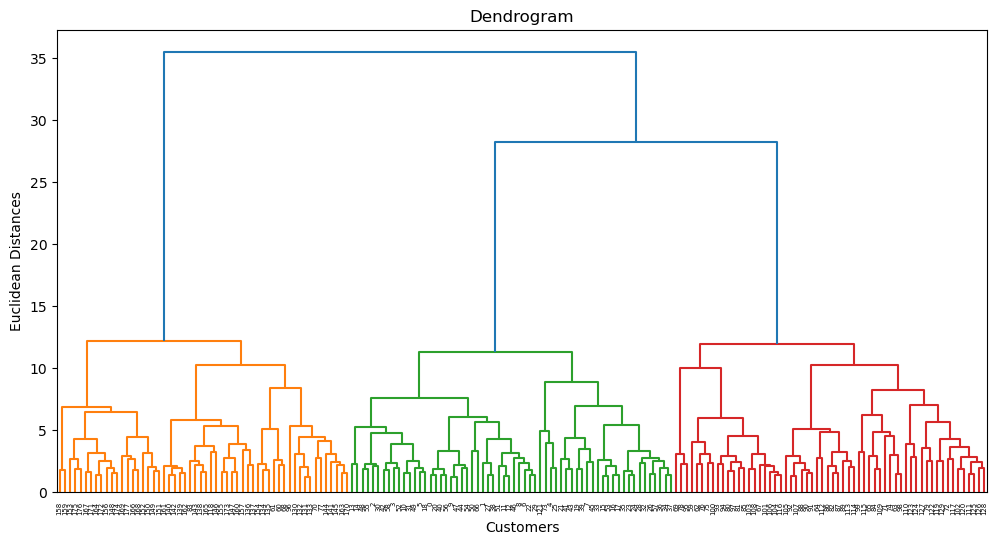

In [51]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# the linkage method determines how the distance between clusters is calculated
# The method='ward' parameter in the sch.linkage function refers to the Ward's method of linkage
# Ward's method is based on the analysis of variance (ANOVA)
# other methods are Single linkage ('single'), Complete linkage ('complete'), Average linkage ('average'), 
#Centroid linkage ('centroid')

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [52]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# n_clusters: number of clusters required
# affinity: This parameter determines the distance metric used for the linkage.
# affinity='euclidean' means Euclidean distance metric is used to measure the dissimilarity between points
# other affinity parametres are 'l1' or 'manhattan', 'l2' or 'euclidean', 'cosine', 'precomputed'

y_hc = hc.fit_predict(X)

# y_hc array contains the predicted cluster labels for each data point in X

In [53]:
#Assigning cluster to Customer type

# Get the cluster labels for each sample
labels = hc.labels_


# Add a new column for customer types based on cluster labels
df['Cluster'] = labels

In [54]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

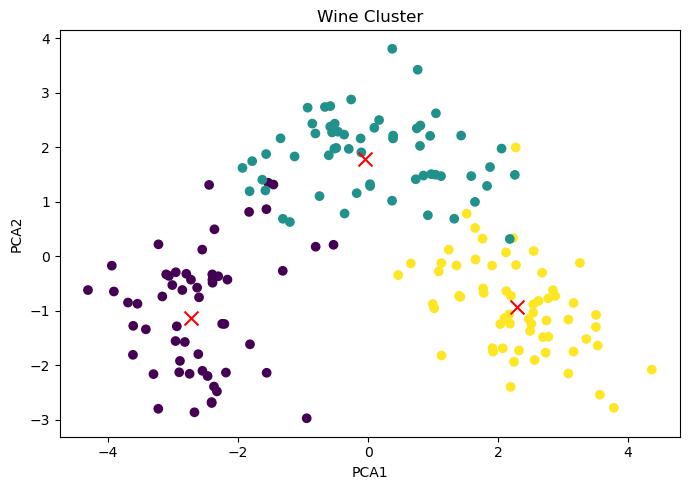

In [55]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=hc.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

# Evaluation metrix

In [56]:
#Silhouette score of Agglomerative Clustering
silhouette_avg1 = silhouette_score(X, y_hc)
print('silhouette score :', silhouette_avg1)

silhouette score : 0.27872059778855557


# DBSCAN

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5,min_samples=6)
y_db = dbscan.fit_predict(X)
clusters = dbscan.labels_
len(set(clusters))

3

In [58]:
np.unique(y_db)

array([-1,  0,  1], dtype=int64)

In [59]:
y_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  1,  0,  0,  0,  0, -1,  0,
       -1, -1, -1, -1,  0, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

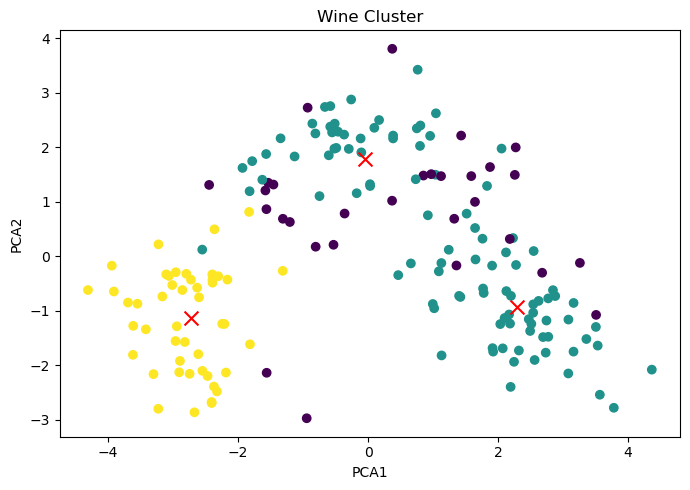

In [60]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=dbscan.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [61]:
#Silhouette score of kmeans clustering
silhouette_avg1 = silhouette_score(X, y_db)
print('silhouette score : ',silhouette_avg1)

silhouette score :  0.19310336229543112


# <font color='green'>Silhouette Score is maximum for Kmeans clustering </font>